In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [5]:
data = {
    'Match ID': range(1,101),
    'Ball Faced': np.random.randint(20,60,100),
    'Previous Runs':np.random.randint(10,100,100),
    'Opponent Strength':np.random.randint(1,5,100),
    'Runs Scored':np.random.randint(20,80,100),
    'Wickets Taken':np.random.randint(0,4,100),
    'Overs Bowled':np.random.randint(2,5,100)
}
data

{'Match ID': range(1, 101),
 'Ball Faced': array([58, 48, 34, 27, 40, 58, 38, 42, 30, 30, 43, 55, 59, 43, 22, 41, 21,
        43, 49, 57, 21, 40, 52, 31, 41, 44, 46, 47, 35, 34, 22, 56, 26, 40,
        28, 58, 37, 23, 44, 33, 28, 45, 21, 39, 47, 26, 27, 54, 33, 36, 55,
        59, 23, 21, 25, 23, 48, 37, 45, 53, 29, 55, 33, 50, 34, 27, 33, 42,
        59, 40, 35, 37, 43, 45, 44, 48, 34, 20, 44, 26, 28, 43, 20, 27, 43,
        30, 36, 27, 54, 54, 52, 24, 58, 47, 26, 28, 27, 31, 53, 52]),
 'Previous Runs': array([57, 32, 71, 97, 46, 53, 95, 44, 74, 56, 87, 12, 10, 14, 99, 23, 36,
        18, 88, 24, 99, 51, 86, 60, 72, 61, 13, 32, 24, 52, 38, 45, 22, 41,
        80, 68, 95, 37, 75, 51, 54, 71, 66, 15, 37, 37, 53, 93, 39, 71, 84,
        98, 71, 10, 36, 71, 86, 12, 79, 81, 36, 18, 71, 46, 60, 53, 33, 88,
        68, 41, 97, 61, 71, 67, 61, 21, 48, 11, 12, 65, 90, 68, 11, 11, 63,
        96, 10, 28, 11, 62, 53, 99, 41, 79, 41, 77, 64, 84, 65, 26]),
 'Opponent Strength': array([3, 2, 4, 1, 

In [7]:
df= pd.DataFrame(data)

In [9]:
df

,Match ID,Ball Faced,Previous Runs,Opponent Strength,Runs Scored,Wickets Taken,Overs Bowled
0,1,58,57,3,65,3,2
1,2,48,32,2,37,0,2
2,3,34,71,4,21,0,3
3,4,27,97,1,73,2,3
4,5,40,46,4,54,1,2
...,...,...,...,...,...,...,...
95,96,28,77,1,46,0,3
96,97,27,64,3,61,1,2
97,98,31,84,1,21,2,3
98,99,53,65,1,45,2,2


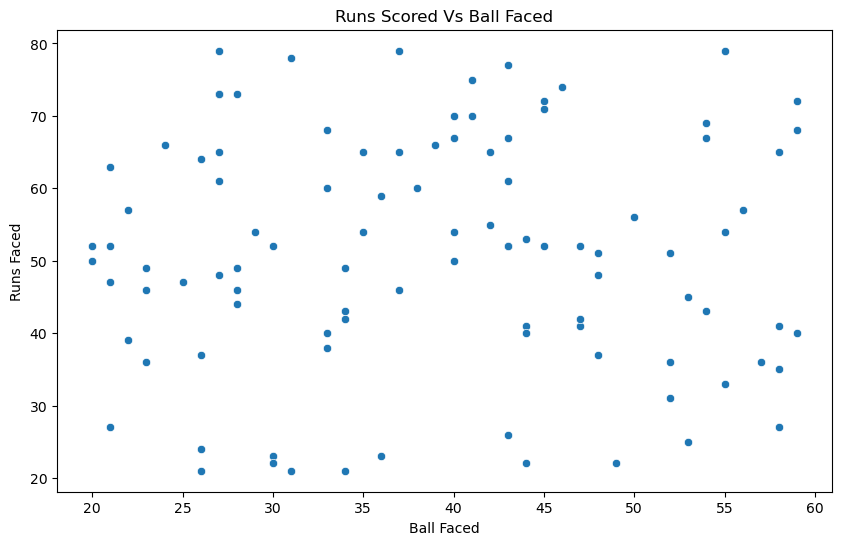

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ball Faced',y='Runs Scored',data=df)
plt.title('Runs Scored Vs Ball Faced')
plt.xlabel('Ball Faced')
plt.ylabel('Runs Faced')
plt.show()

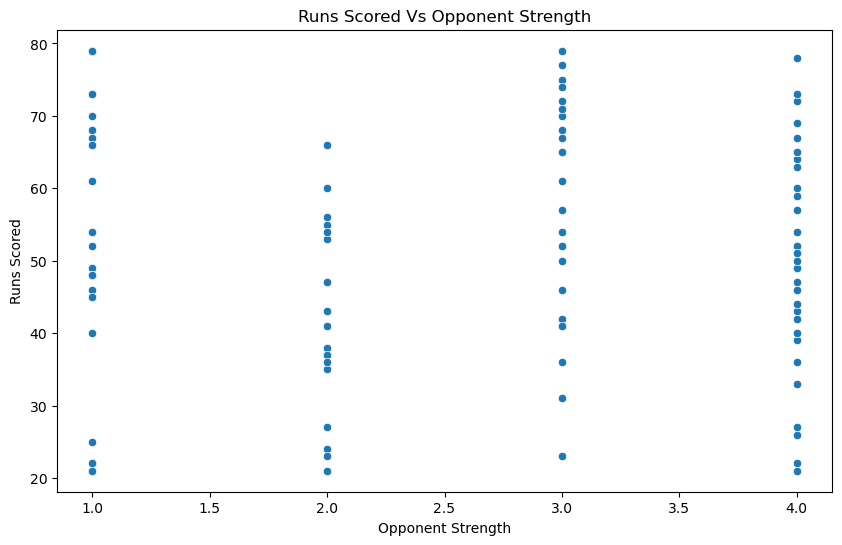

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Opponent Strength', y='Runs Scored',data=df)
plt.title('Runs Scored Vs Opponent Strength')
plt.xlabel('Opponent Strength')
plt.ylabel('Runs Scored')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score


In [23]:
X=df.drop(columns=['Match ID','Runs Scored','Wickets Taken','Overs Bowled'])
y=df['Runs Scored']


In [25]:
X

,Ball Faced,Previous Runs,Opponent Strength
0,58,57,3
1,48,32,2
2,34,71,4
3,27,97,1
4,40,46,4
...,...,...,...
95,28,77,1
96,27,64,3
97,31,84,1
98,53,65,1


In [27]:
y

0     65
1     37
2     21
3     73
4     54
      ..
95    46
96    61
97    21
98    45
99    36
Name: Runs Scored, Length: 100, dtype: int32

In [35]:
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)model= LinearRegression()
model.fit(X_train,y_train)

In [41]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Absolute Error: 11.177181721187985
R2 Score: -0.016309642276676417


In [45]:
y_pred = model.predict(X_test)

mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Absolute Error: 11.177181721187985
R2 Score: -0.016309642276676417


In [47]:
import streamlit as st

# Assuming the trained model is already loaded
# model = ...

st.title('Cricket Performance Prediction')

# Get user input
balls_faced = st.number_input('Balls Faced', min_value=1, max_value=100)
previous_runs = st.number_input('Previous Runs', min_value=0, max_value=200)
opponent_strength = st.slider('Opponent Strength', 1, 5)
  

# Prepare input data for prediction
input_data = np.array([[balls_faced, previous_runs, opponent_strength]]) 
predicted_runs = model.predict(input_data)

st.write(f'Predicted Runs Scored: {predicted_runs[0]:.2f}')

2024-11-19 20:57:40.097 
  command:

    streamlit run D:\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-19 20:57:40.098 Session state does not function when running a script without `streamlit run`
D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
